# 表格整理

In [22]:
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv("./csv/detail_video.csv")

# 转换时间列的格式为按月份
df['笔记时间'] = pd.to_datetime(df['笔记时间'], format="%Y年%m月%d日%H点%M分%S秒")
df['笔记时间（按月份）'] = df['笔记时间'].dt.strftime("%Y-%m")

# 统计每个月份的条数
month_counts = df['笔记时间（按日）'].value_counts().reset_index()
month_counts.columns = ['笔记时间（按日）', '数量']

# 将统计结果添加为新的列到原本的表格中
df = df.merge(month_counts, on='笔记时间（按日）', how='left')

# 打印结果
print(df)

# 保存修改后的表格
df.to_csv("./csv/detail_video_modified.csv", index=False)

               用户名                   笔记标题  \
0     LeonardWu-吴阳  戒手机的1457.3分钟，我真的太痛苦了！   
1             Флон                 蹭吃蹭喝日常   
2           yusiii        景德镇学陶 做碗（2）圆碗拉高   
3            野人Xin          24岁，坦白局，面对现实！   
4             伊德夫人        哪些国家能让你长期边玩边工作?   
...            ...                    ...   
1125   鱼二摆IP新媒体工作室  躺平必备8⃣️大远程办公网站，边躺边赚⁉️   
1126        yusiii     景德镇学陶 修坯（5）固定泥巴 修底   
1127      虚拟人ALiCE       🔛🛸｛装载浪漫 一起登DAO ｝   
1128  中创侨智Victoria               希腊数字游民签证   
1129         丁小翼10  30岁后，我决定不再上班了❗️不上班请进✅   

                                                   笔记描述                笔记时间  \
0                                               各位小伙伴们， 2023-08-11 14:46:18   
1                                      在一个俄罗斯大叔家蹭吃蹭喝 ## 2023-08-06 03:32:19   
2                                                   NaN 2022-09-26 08:08:05   
3                                    不知不觉，是成为数字游民的第2年了。 2022-06-26 22:33:43   
4     互联网的快速发展造就了一批数字游民✨，只要有电脑，有网络，哪里都是办公室，在世界的任何角落都... 2021-07-

# 图片数据柱状图

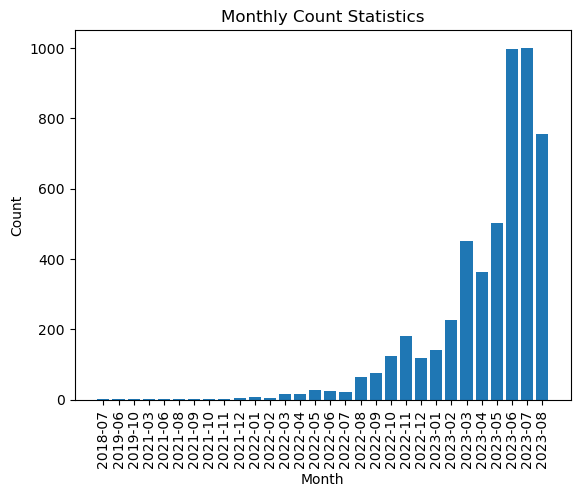

In [21]:
import matplotlib.pyplot as plt

# 绘制柱状图
plt.bar(df['笔记时间（按月份）'], df['数量'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Count Statistics')
plt.xticks(rotation=90)
plt.show()

# 视频数据柱状图

                用户名                      笔记标题  \
720             大琪琪  什么是Digital Nomad 数字游牧生活？   
4              伊德夫人           哪些国家能让你长期边玩边工作?   
1007  Where is Mia?                       NaN   
528         Gracie羊          【自由潜水】又是海中偶遇🐢的一天   
748       Novo Surf       旅居巴厘岛住在哪 - Canggu小镇   
...             ...                       ...   
897      Leona从此不早朝                    开始积极营业   
896           大马学而思            北京换到吉隆坡上班太快乐啦！   
478         Deux224                 8月千岛湖Day2   
459             未晚🌙            你眼里的数字游民是什么样的？   
0      LeonardWu-吴阳     戒手机的1457.3分钟，我真的太痛苦了！   

                                                   笔记描述                笔记时间  \
720      Nomad Life 游牧生活是一种态度，一种信仰。选择住在喜欢的地方，简简单单，远离喧嚣。 2021-07-28 06:12:19   
4     互联网的快速发展造就了一批数字游民✨，只要有电脑，有网络，哪里都是办公室，在世界的任何角落都... 2021-07-28 17:11:52   
1007                   什么阻止了你辞职？转行？跳槽？创业？30岁裸辞之后的我怎么样了？ 2021-08-20 23:04:42   
528                                                 NaN 2021-09-29 11:09:15   
748             

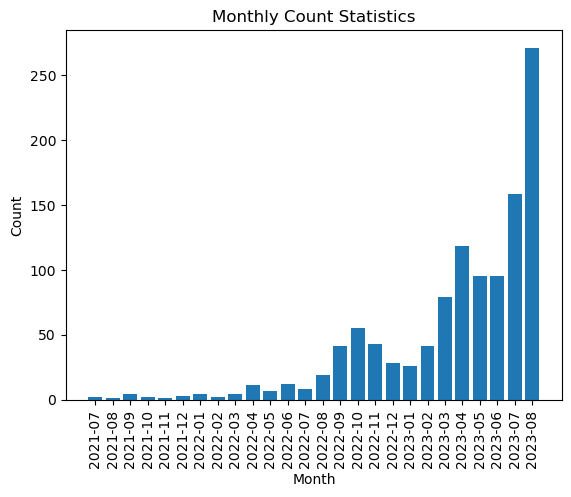

In [38]:

import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
df = pd.read_csv("./csv/detail_video.csv")

# 转换时间列的格式为按月份
df['笔记时间'] = pd.to_datetime(df['笔记时间'], format="%Y年%m月%d日%H点%M分%S秒")
df['笔记时间（按月份）'] = df['笔记时间'].dt.strftime("%Y-%m")

# 统计每个月份的条数
month_counts = df['笔记时间（按月份）'].value_counts().reset_index()
month_counts.columns = ['笔记时间（按月份）', '数量']

# 将统计结果添加为新的列到原本的表格中
df = df.merge(month_counts, on='笔记时间（按月份）', how='left')

# 将数据按照月份升序排列
df = df.sort_values(by='笔记时间（按月份）', ascending=True)

# 打印结果
print(df)

# 绘制柱状图
plt.bar(df['笔记时间（按月份）'], df['数量'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Count Statistics')
plt.xticks(rotation=90)
plt.show()

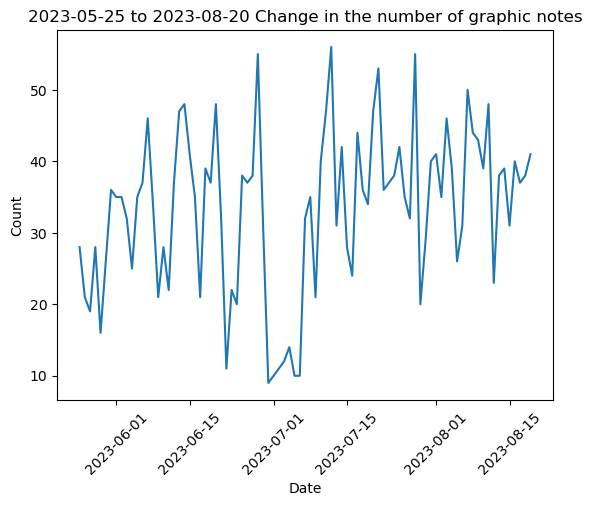

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
df = pd.read_csv("./csv/detail_image.csv")

# 转换时间列的格式为按日期
df['笔记时间'] = pd.to_datetime(df['笔记时间'], format="%Y年%m月%d日%H点%M分%S秒")

start_date = pd.to_datetime('2023-05-25')
end_date = pd.to_datetime('2023-08-20')
df_filtered = df[(df['笔记时间'] >= start_date) & (df['笔记时间'] <= end_date)]

# 按日期进行统计
day_counts = df_filtered.groupby(df_filtered['笔记时间'].dt.date).size().reset_index(name='数量')

# 绘制折线图
plt.plot(day_counts['笔记时间'], day_counts['数量'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('2023-05-25 to 2023-08-20 Change in the number of graphic notes')
plt.xticks(rotation=45)

plt.show()

# 保存修改后的表格
df_filtered.to_csv("./csv/detail_image_modified.csv", index=False)

/var/folders/p3/fy_k3_cx34g68bznfywdw0sm0000gn/T/ipykernel_41984/1027707965.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(counts_china_provinces.index, fontproperties=font)
/var/folders/p3/fy_k3_cx34g68bznfywdw0sm0000gn/T/ipykernel_41984/1027707965.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(counts_others.index, fontproperties=font)


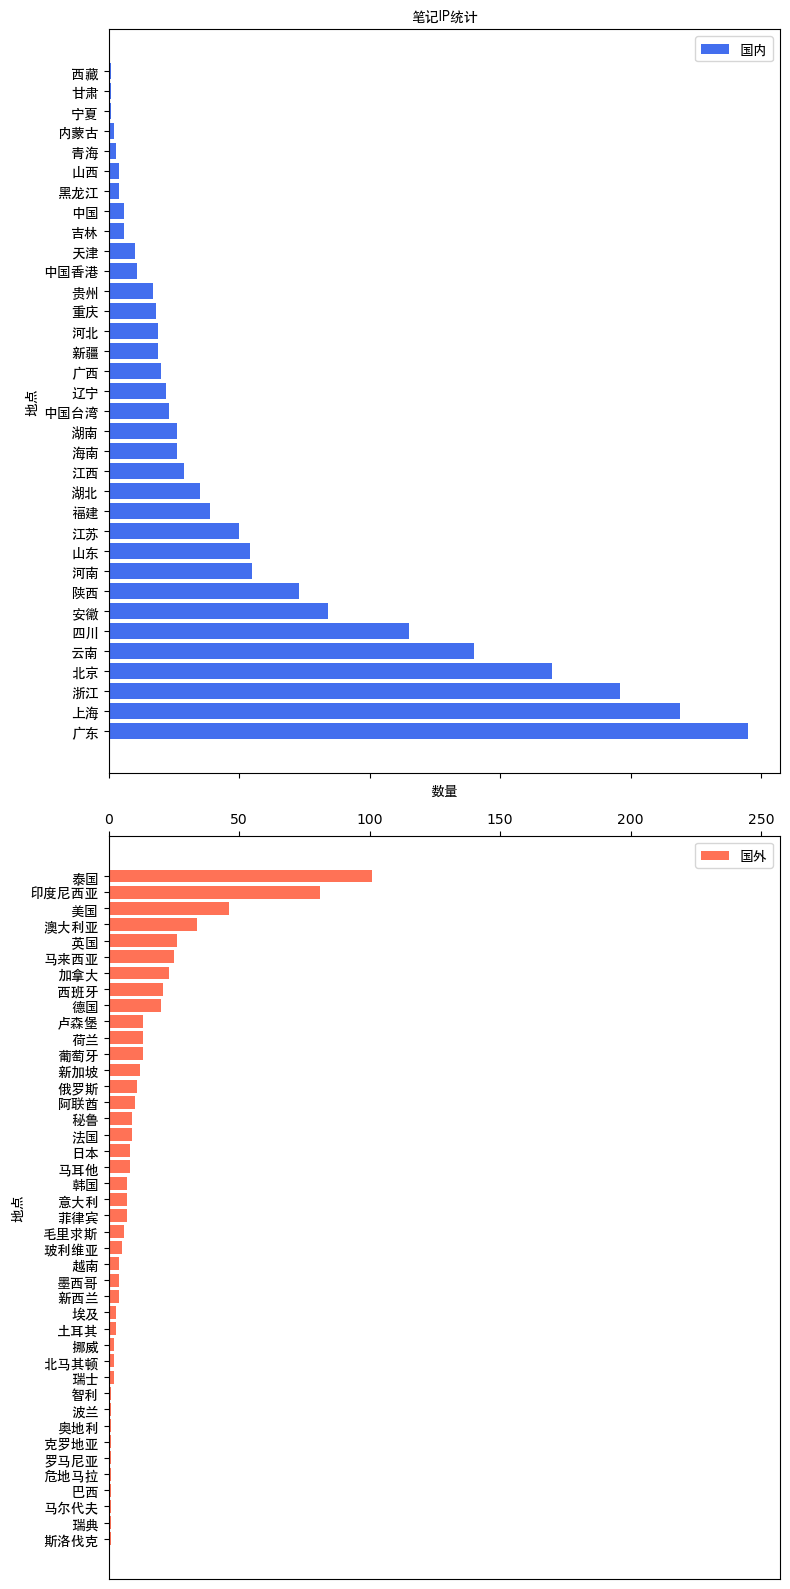

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


# 读取第一个 CSV 文件
df = pd.read_csv("./0901.csv")


# 剔除地点为“未知”的数据
df_filtered = df[df['笔记地点'] != '未知']

# 分类地点为中国省份和其他地点
china_provinces = ['河北', '山西', '黑龙江', '吉林', '辽宁', '江苏', '浙江', '安徽', '福建', '江西', '山东',
                   '河南', '湖北', '湖南', '广东', '海南', '四川', '贵州', '云南', '陕西', '甘肃', '青海',
                   '中国台湾', '台湾', '内蒙古', '广西', '西藏', '宁夏', '新疆', '北京', '天津', '上海', '重庆',
                   '香港', '澳门', '中国香港', '中国澳门', '中国']
others = [location for location in df_filtered['笔记地点'].unique() if location not in china_provinces]

# 按分类筛选数据
df_china_provinces = df_filtered[df_filtered['笔记地点'].isin(china_provinces)]
df_others = df_filtered[df_filtered['笔记地点'].isin(others)]

# 统计每个分类地点的数量，并按数量降序排列
counts_china_provinces = df_china_provinces['笔记地点'].value_counts().sort_values(ascending=False)
counts_others = df_others['笔记地点'].value_counts().sort_values(ascending=False)

# 指定中文字体
font = FontProperties(family='Heiti TC')

# 创建画布和子图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 16), sharex=True)

# 绘制第一个横向柱状图
ax1.barh(counts_china_provinces.index, counts_china_provinces.values, color='#436EEE', label='国内')
ax1.set_yticklabels(counts_china_provinces.index, fontproperties=font)
ax1.set_xlabel('数量', fontproperties=font)
ax1.set_ylabel('地点', fontproperties=font)
ax1.set_title('笔记IP统计', fontproperties=font)
ax1.legend(prop=font) # 添加图例

# 绘制第二个横向柱状图
ax2.barh(counts_others.index, counts_others.values, color='#FF7256', label='国外')
ax2.set_yticklabels(counts_others.index, fontproperties=font)
ax2.set_ylabel('地点', fontproperties=font)
ax2.legend(prop=font) # 添加图例
ax2.xaxis.tick_top()  # 将横轴刻度放在上方
ax2.invert_yaxis() # 反转纵轴顺序，使数量降序排列

plt.tight_layout()
plt.show()


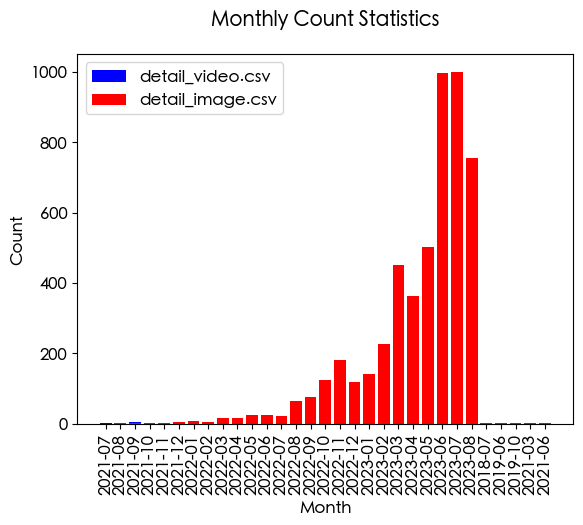

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 detail_video.csv 文件
df_video = pd.read_csv("./csv/detail_video.csv")

# 转换时间列的格式为按月份
df_video['笔记时间'] = pd.to_datetime(df_video['笔记时间'], format="%Y年%m月%d日%H点%M分%S秒")
df_video['笔记时间（按月份）'] = df_video['笔记时间'].dt.strftime("%Y-%m")

# 统计每个月份的条数
month_counts_video = df_video['笔记时间（按月份）'].value_counts().reset_index()
month_counts_video.columns = ['笔记时间（按月份）', '数量']

# 将统计结果添加为新的列到原本的表格中
df_video = df_video.merge(month_counts_video, on='笔记时间（按月份）', how='left')

# 读取 detail_image.csv 文件
df_image = pd.read_csv("./csv/detail_image.csv")

# 转换时间列的格式为按月份
df_image['笔记时间'] = pd.to_datetime(df_image['笔记时间'], format="%Y年%m月%d日%H点%M分%S秒")
df_image['笔记时间（按月份）'] = df_image['笔记时间'].dt.strftime("%Y-%m")

# 统计每个月份的条数
month_counts_image = df_image['笔记时间（按月份）'].value_counts().reset_index()
month_counts_image.columns = ['笔记时间（按月份）', '数量']

# 将统计结果添加为新的列到原本的表格中
df_image = df_image.merge(month_counts_image, on='笔记时间（按月份）', how='left')

# 将数据按照月份升序排列
df_video = df_video.sort_values(by='笔记时间（按月份）', ascending=True)
df_image = df_image.sort_values(by='笔记时间（按月份）', ascending=True)

# 绘制柱状图并加上图例
plt.bar(df_video['笔记时间（按月份）'], df_video['数量'], color='blue', label='detail_video.csv')
plt.bar(df_image['笔记时间（按月份）'], df_image['数量'], color='red', label='detail_image.csv')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Count Statistics')
plt.xticks(rotation=90)
plt.legend()
plt.show()


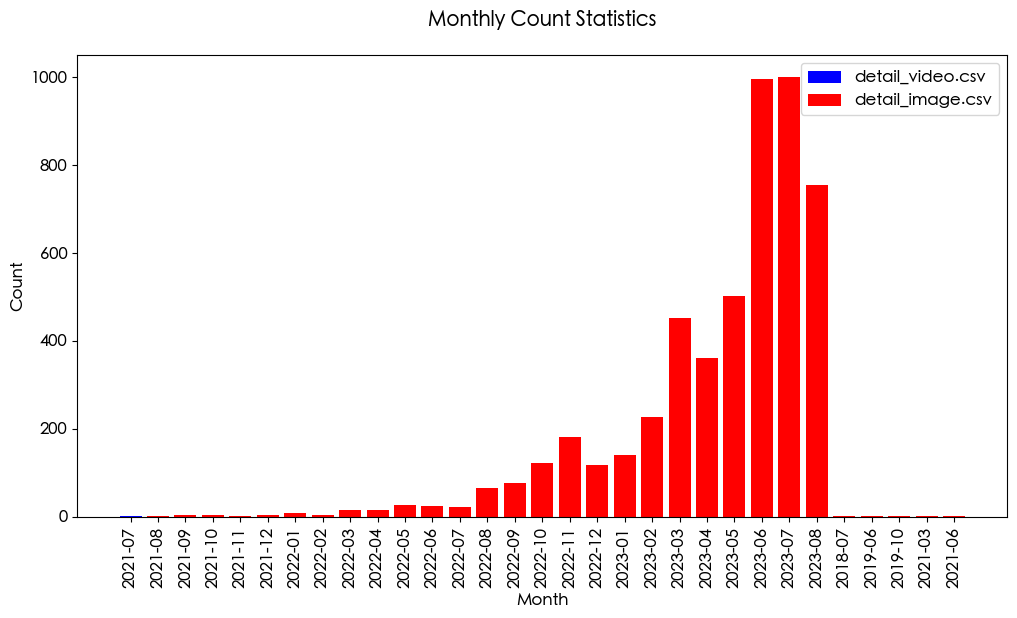

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 detail_video.csv 文件
df_video = pd.read_csv("./csv/detail_video.csv")

# 转换时间列的格式为按月份
df_video['笔记时间'] = pd.to_datetime(df_video['笔记时间'], format="%Y年%m月%d日%H点%M分%S秒")
df_video['笔记时间（按月份）'] = df_video['笔记时间'].dt.strftime("%Y-%m")

# 统计每个月份的条数
month_counts_video = df_video['笔记时间（按月份）'].value_counts().reset_index()
month_counts_video.columns = ['笔记时间（按月份）', '数量']

# 将统计结果添加为新的列到原本的表格中
df_video = df_video.merge(month_counts_video, on='笔记时间（按月份）', how='left')

# 读取 detail_image.csv 文件
df_image = pd.read_csv("./csv/detail_image.csv")

# 转换时间列的格式为按月份
df_image['笔记时间'] = pd.to_datetime(df_image['笔记时间'], format="%Y年%m月%d日%H点%M分%S秒")
df_image['笔记时间（按月份）'] = df_image['笔记时间'].dt.strftime("%Y-%m")

# 统计每个月份的条数
month_counts_image = df_image['笔记时间（按月份）'].value_counts().reset_index()
month_counts_image.columns = ['笔记时间（按月份）', '数量']

# 将统计结果添加为新的列到原本的表格中
df_image = df_image.merge(month_counts_image, on='笔记时间（按月份）', how='left')

# 将数据按照月份升序排列
df_video = df_video.sort_values(by='笔记时间（按月份）', ascending=True)
df_image = df_image.sort_values(by='笔记时间（按月份）', ascending=True)

# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制柱状图并加上图例
plt.bar(df_video['笔记时间（按月份）'], df_video['数量'], color='blue', label='detail_video.csv')
plt.bar(df_image['笔记时间（按月份）'], df_image['数量'], color='red', label='detail_image.csv')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Count Statistics')
plt.xticks(rotation=90)
plt.legend()
plt.show()
